<a href="https://colab.research.google.com/github/PaninaEkaterina/statprak/blob/main/4_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

## Отчет для Министерства Транспорта

**Подготовка данных**

In [1]:
# Скачиваем дополнительные пакеты
!pip install basemap &>/dev/null && echo Done

Done


In [2]:
# Делаем необходимые импорты
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm
import numpy as np
import pandas as pd

In [3]:
# Скачиваем данные
import kagglehub
path = kagglehub.dataset_download("usdot/flight-delays")

100%|██████████| 191M/191M [00:03<00:00, 56.8MB/s]


Extracting files...


In [4]:
# Открываем таблицы
airlines = pd.read_csv(f"{path}/airlines.csv")
airports = pd.read_csv(f"{path}/airports.csv")
# Следующая строчка довольно медленная, так как файл размером 0.5Гб
flights = pd.read_csv(f"{path}/flights.csv", low_memory=False)

**Гипотеза 1:Задержка по дням недели**








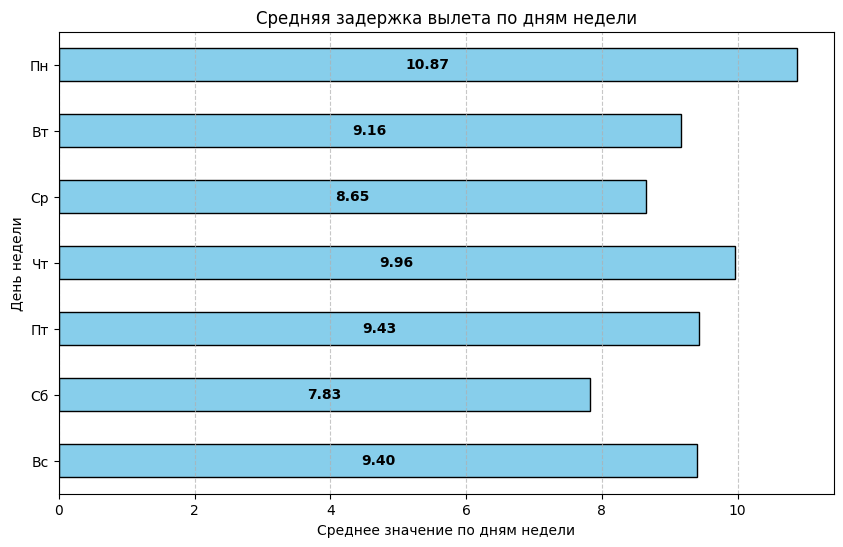

In [5]:
daily_avg = flights.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].mean()
plt.figure(figsize=(10, 6))
ax = daily_avg.plot(kind="barh", color="skyblue", edgecolor="black")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="center", fontweight="bold")
ax.invert_yaxis()

# Наводим красоту
plt.title("Средняя задержка вылета по дням недели")
plt.xlabel("Среднее значение по дням недели")
plt.ylabel("День недели")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Заменяем цифры на аббревиатуры дней
days_mapping = dict(zip(
  [1, 2, 3, 4, 5, 6, 7],
  "Пн Вт Ср Чт Пт Сб Вс".split()
))
plt.yticks(
  ticks=range(len(daily_avg)),
  labels=[days_mapping[day] for day in daily_avg.index]
)
plt.show()

Из диаграммы видно, что в целом большой разницы между днями недели нет, но немного чаще вылет задерживается в понедельник.Потенциальные действия, которые можно предпринять:увеличение персонала, оптимизация расписания, улучшение координации с авиакомпаниями.

**Гипотеза 2: Задержка по месяцам**







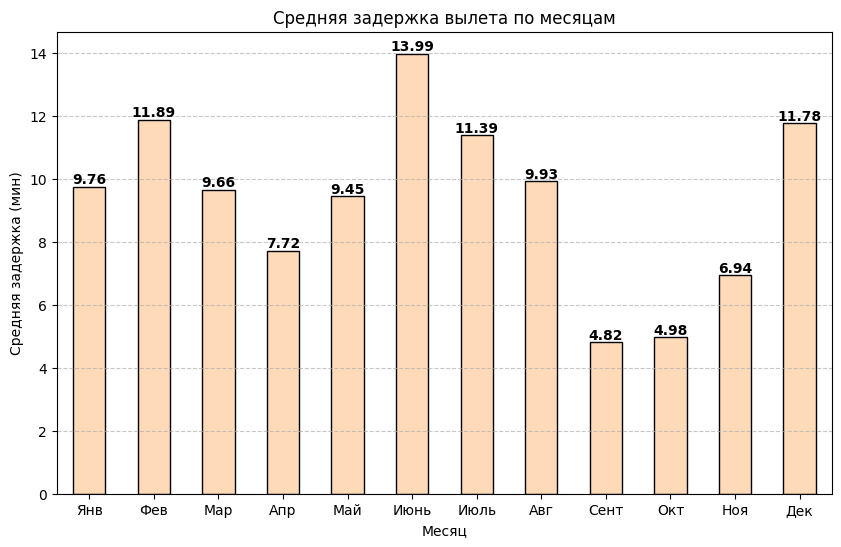

In [6]:
monthly_avg = flights.groupby("MONTH")["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(10, 6))
ax = monthly_avg.plot(kind="bar", color="peachpuff", edgecolor="black")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge", fontweight="bold")

plt.title("Средняя задержка вылета по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средняя задержка (мин)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Заменяем цифры на названия месяцев
months_mapping = dict(zip(
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  "Янв Фев Мар Апр Май Июнь Июль Авг Сент Окт Ноя Дек".split()
))
plt.xticks(
  ticks=range(len(monthly_avg)),
  labels=[months_mapping[month] for month in monthly_avg.index]
)
plt.xticks(rotation=0)
plt.show()

На диаграмме видно, что задержки рейсов в июне, феврале и декабре значительно выше, чем в другие месяцы, это может сигнализировать о различных факторах, которые требуют внимания.Возможно стоит выделить дополнительный персонал и подумать о расширении аэропорта.

**Гипотеза 3: Задержка в зависимости от времени суток**

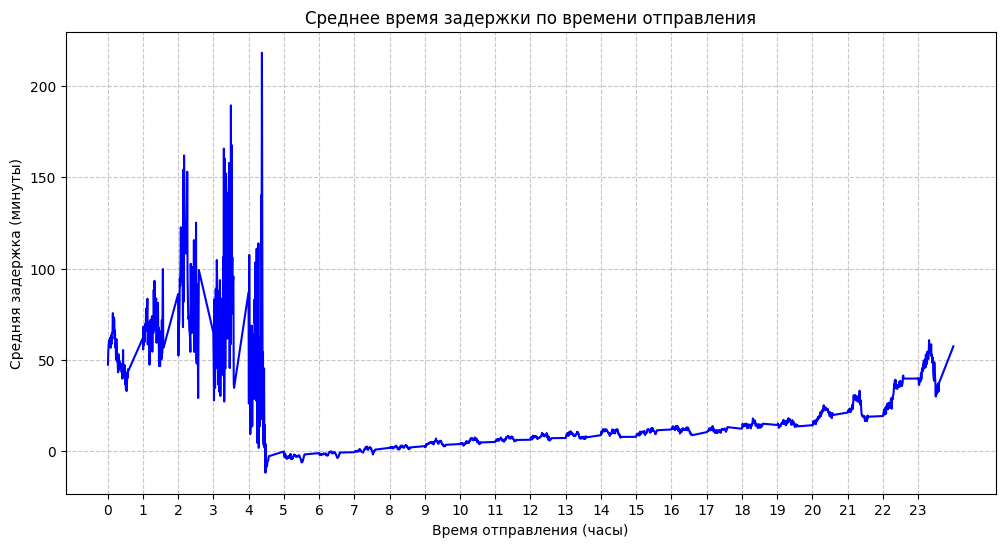

In [7]:
avg = flights.groupby("DEPARTURE_TIME")["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg.index / 100, avg.values,  linestyle='-', color='blue')

plt.xlabel("Время отправления (часы)")
plt.ylabel("Средняя задержка (минуты)")
plt.title("Среднее время задержки по времени отправления")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])
plt.show()

По графику видно, что наибольший скачок задержек происходит в 4-5 утра. Вероятно это связано с человеческим фактором, ведь ночью человек хуже воспринимает информацию и, соответственно, происходят ситуации, в которых возможна задержка рейса.

**Гипотеза 4: Задержка в зависимости от загруженности авиалиний**

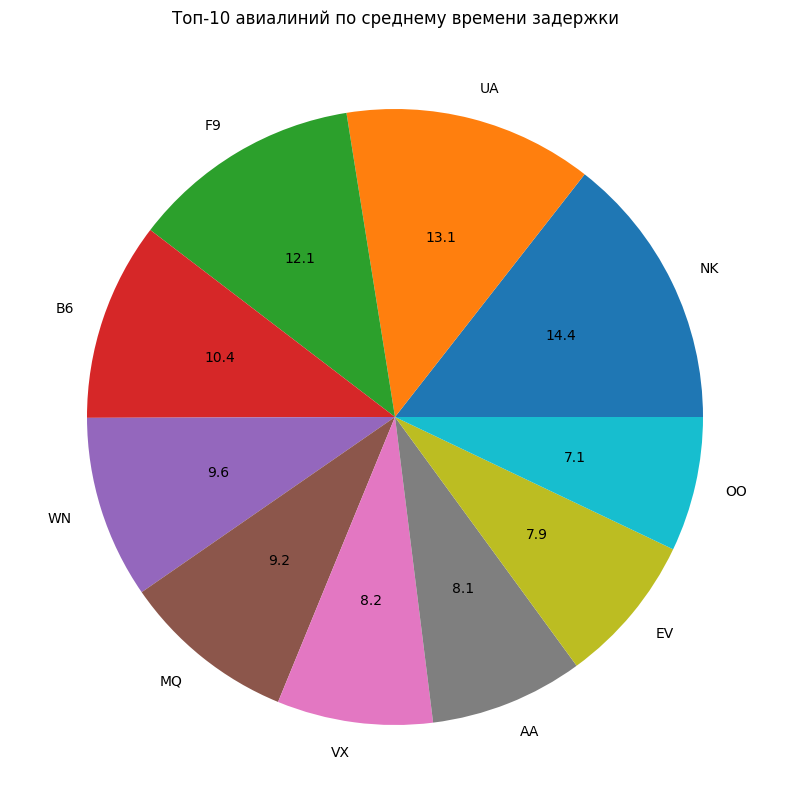

In [8]:
n = 10

airport_avg = flights.groupby("AIRLINE")["DEPARTURE_DELAY"].mean()
airport_avg.sort_values(ascending=False, inplace=True)
airport_avg = airport_avg[:n]

plt.figure(figsize=(10, 10))
plt.pie(airport_avg.values, labels=airport_avg.index, autopct="%.1f")
plt.title(f"Топ-{n} авиалиний по среднему времени задержки")
plt.show()

На нашей круговой диаграмме видно, какие авиалинии чаще всего сталкиваются с задержками.С небольшим отрывом "лидирует" NK.


**Гипотеза 5:Задержка в зависимости от загруженности аэропортов**

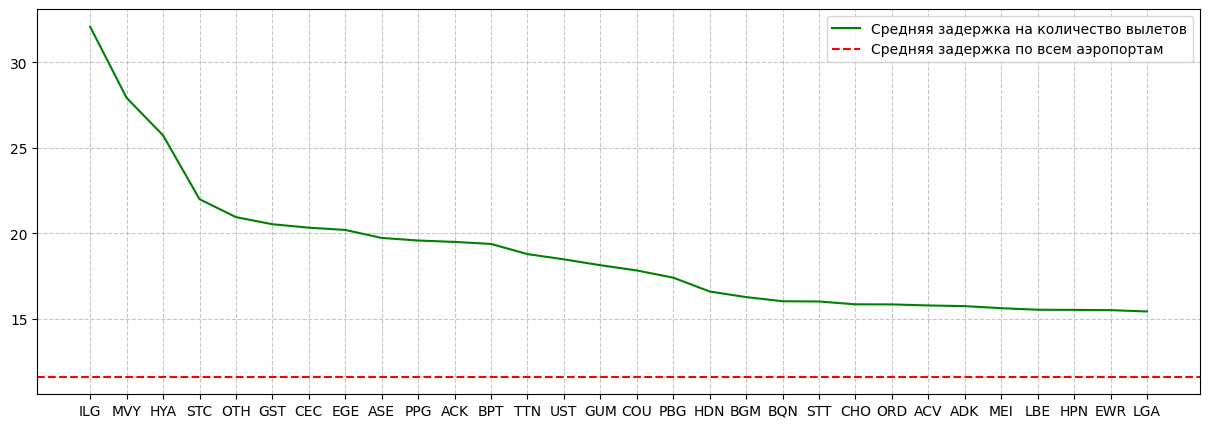

In [15]:
# Способ 1
useful_flights = flights[~flights["ORIGIN_AIRPORT"].str.isdigit()]
bad = useful_flights[useful_flights["DEPARTURE_DELAY"] > 0]
bad_group = bad.groupby("ORIGIN_AIRPORT")
all_group = useful_flights.groupby("ORIGIN_AIRPORT")

bad_sum = bad_group["DEPARTURE_DELAY"].sum()
all_size = all_group.size()

flights_avg = (bad_sum/all_size).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
plt.plot(flights_avg[:30], linestyle='-', color='green', label="Средняя задержка на количество вылетов")
plt.axhline(flights_avg.mean(), linestyle='--', color='red', label="Средняя задержка по всем аэропортам")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(loc="best")
plt.show()

In [10]:
#Способ 2

# Вспомогательный код, часть 1
# Взято (без изменений) отсюда:
# https://matplotlib.org/stable/gallery/misc/packed_bubbles.html
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')
# Вспомогательный код, часть 2
# Взято отсюда: https://stackoverflow.com/a/64369873
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

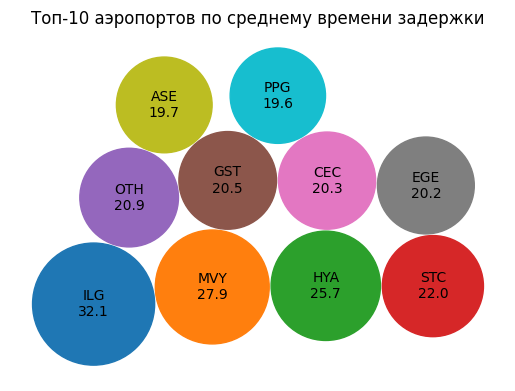

In [18]:
# Основной код
idx = ~flights["ORIGIN_AIRPORT"].str.isdigit()
airport_avg = flights[idx]
airport_avg = ((airport_avg[airport_avg["DEPARTURE_DELAY"] > 0]).groupby("ORIGIN_AIRPORT")["DEPARTURE_DELAY"].sum())/(airport_avg.groupby("ORIGIN_AIRPORT")["DEPARTURE_DELAY"].size())
airport_avg.sort_values(ascending=False, inplace=True)
airport_avg = airport_avg[:10] # Топ-10
labels = [f"{name}\n{value:.1f}" for name, value in airport_avg.items()]

bubble_chart = BubbleChart(area=airport_avg.values, bubble_spacing=0.1)
bubble_chart.collapse()

_, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, labels, colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title("Топ-10 аэропортов по среднему времени задержки")

plt.show()

Видно, что с большим отрывом средняя задержка большая у аэропорта ILG

**Гипотеза 6:Задержка с учетом плотности расположения аэропортов**

In [12]:
orig = pd.merge(
  airports, flights,
  left_on="IATA_CODE", right_on="ORIGIN_AIRPORT",
  how="inner"
)
dest = pd.merge(
  airports, flights,
  left_on="IATA_CODE", right_on="DESTINATION_AIRPORT",
  how="inner"
)

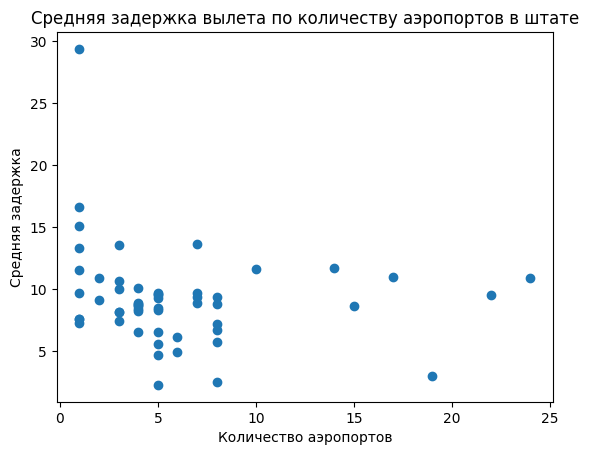

In [13]:
airports_count = airports.groupby("STATE")["IATA_CODE"].count()
mean_delay = orig.groupby("STATE")["DEPARTURE_DELAY"].mean()
plt.scatter(airports_count, mean_delay)
plt.title("Средняя задержка вылета по количеству аэропортов в штате")
plt.xlabel("Количество аэропортов")
plt.ylabel("Средняя задержка")
plt.show()

Видим, что чем больше аэропортов на конкретной территории, тем меньше задержка рейсов

Итак,наше исследование позволило выявить многообразие факторов, влияющих на задержки рейсов, что подчеркивает необходимость комплексного подхода к решению данной проблемы. Мы рекомендуем Министерству транспорта:

- Уделить внимание оптимизации работы загруженных аэропортов, включая расширение инфраструктуры и внедрение более эффективных систем управления воздушным движением.
- Рассмотреть возможность разработки рекомендаций для авиакомпаний по оптимизации расписания рейсов в зависимости от выявленных закономерностей.
- Внедрить системы мониторинга и прогнозирования задержек на основе исторических данных, что позволит оперативно реагировать на потенциальные проблемы.

Эти меры помогут улучшить качество обслуживания пассажиров и снизить уровень задержек.